In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 🎨 Set aesthetic
sns.set_context('talk')
sns.set_style('darkgrid')


In [4]:
df = pd.read_csv('adult.csv')

In [5]:
df.describe()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [6]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB
None


In [7]:
# View first few rows
print(df.head(10))

   age    workclass  fnlwgt     education  education.num marital.status  \
0   90            ?   77053       HS-grad              9        Widowed   
1   82      Private  132870       HS-grad              9        Widowed   
2   66            ?  186061  Some-college             10        Widowed   
3   54      Private  140359       7th-8th              4       Divorced   
4   41      Private  264663  Some-college             10      Separated   
5   34      Private  216864       HS-grad              9       Divorced   
6   38      Private  150601          10th              6      Separated   
7   74    State-gov   88638     Doctorate             16  Never-married   
8   68  Federal-gov  422013       HS-grad              9       Divorced   
9   41      Private   70037  Some-college             10  Never-married   

          occupation    relationship   race     sex  capital.gain  \
0                  ?   Not-in-family  White  Female             0   
1    Exec-managerial   Not-in-family

In [8]:
# Check for null values
print("\nNull values in each column:")
print(df.isnull().sum())


Null values in each column:
age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64


In [9]:
# Identify duplicated rows
print("\nDuplicated rows:")
duplicates = df[df.duplicated()]
print(duplicates.index)


Duplicated rows:


Index([ 8453,  8645, 12202, 14346, 15603, 17344, 19067, 20388, 20507, 22783,
       22934, 23276, 23660, 23720, 23827, 26738, 27133, 28796, 29051, 29334,
       29604, 31060, 32065, 32419],
      dtype='int64')


In [10]:
# Check for '?' as missing value indicator
print("\nPercent of '?' in each column:")
for col in df.columns:
    percent_missing = (df[col] == '?').sum() / df[col].count()
    print(f"{col}: {percent_missing:.2%}")


Percent of '?' in each column:
age: 0.00%
workclass: 5.64%
fnlwgt: 0.00%
education: 0.00%
education.num: 0.00%


marital.status: 0.00%
occupation: 5.66%
relationship: 0.00%
race: 0.00%
sex: 0.00%
capital.gain: 0.00%
capital.loss: 0.00%
hours.per.week: 0.00%
native.country: 1.79%
income: 0.00%


In [11]:
# Remove rows with '?' in any column
for col in df.columns:
    df = df[df[col] != '?']

# Remove duplicated rows
df = df.drop_duplicates()

# Verify data cleanliness
print("\nAfter cleaning:")
print("Duplicated rows:", df.duplicated().sum())
for col in df.columns:
    print(f"Rows with '?' in {col}: {(df[col] == '?').sum()}")

#check number of duplicated rows and number of rows with '?'
print("\n\nDuplicated rows:")
index_of_duplicates = df[df.duplicated()].index
print(index_of_duplicates)

# Check number of rows with '?'
print("\n\nRows with '?':")
for col in df.columns:
    no_of_uk = (df[col] == '?').sum()
    print(col, ":", no_of_uk)



After cleaning:
Duplicated rows: 0
Rows with '?' in age: 0
Rows with '?' in workclass: 0
Rows with '?' in fnlwgt: 0
Rows with '?' in education: 0
Rows with '?' in education.num: 0
Rows with '?' in marital.status: 0
Rows with '?' in occupation: 0
Rows with '?' in relationship: 0
Rows with '?' in race: 0
Rows with '?' in sex: 0
Rows with '?' in capital.gain: 0
Rows with '?' in capital.loss: 0
Rows with '?' in hours.per.week: 0
Rows with '?' in native.country: 0
Rows with '?' in income: 0


Duplicated rows:
Index([], dtype='int64')


Rows with '?':
age : 0
workclass : 0
fnlwgt : 0
education : 0
education.num : 0
marital.status : 0
occupation : 0
relationship : 0
race : 0
sex : 0
capital.gain : 0
capital.loss : 0
hours.per.week : 0
native.country : 0
income : 0


In [12]:
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
5,34,Private,216864,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,0,3770,45,United-States,<=50K
6,38,Private,150601,10th,6,Separated,Adm-clerical,Unmarried,White,Male,0,3770,40,United-States,<=50K


In [13]:
# Number of categories in each column
print("\nNumber of unique categories per column:")
for col in df.columns:
    print(f"{col}: {df[col].nunique()}")


Number of unique categories per column:
age: 72
workclass: 7
fnlwgt: 20263
education: 16
education.num: 16
marital.status: 7
occupation: 14
relationship: 6
race: 5
sex: 2
capital.gain: 118
capital.loss: 90
hours.per.week: 94
native.country: 41
income: 2


In [14]:
# One-hot encoding for 'workclass' (for demonstration)
df_ohe = pd.get_dummies(df, columns=['workclass'], prefix='workclass')

In [15]:
# Show numerical, boolean, and categorical columns
print("\nNumerical columns:", df.select_dtypes(include=[np.number]).columns.tolist())
print("Boolean columns:", df.select_dtypes(include=[bool]).columns.tolist())
print("Categorical columns:", df.select_dtypes(exclude=[np.number, bool]).columns.tolist())



Numerical columns: ['age', 'fnlwgt', 'education.num', 'capital.gain', 'capital.loss', 'hours.per.week']
Boolean columns: []
Categorical columns: ['workclass', 'education', 'marital.status', 'occupation', 'relationship', 'race', 'sex', 'native.country', 'income']


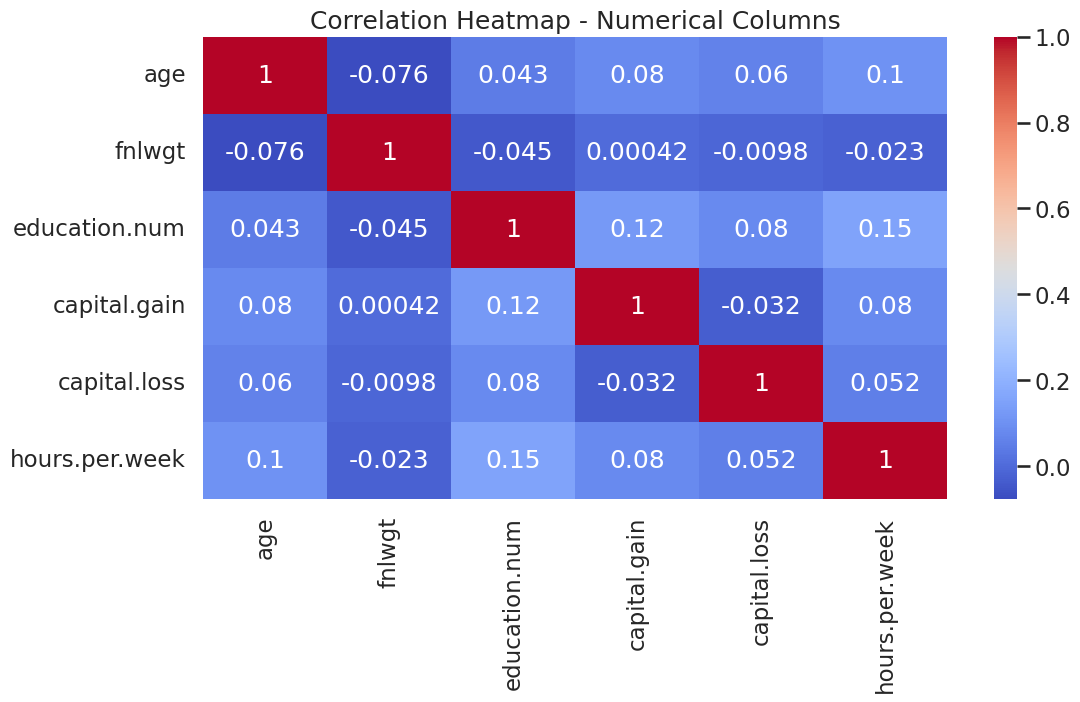

In [16]:
# Correlation heatmap (numerical columns)
plt.figure(figsize=(12, 6))
sns.heatmap(df.select_dtypes(include=[np.number]).corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap - Numerical Columns')
plt.show()


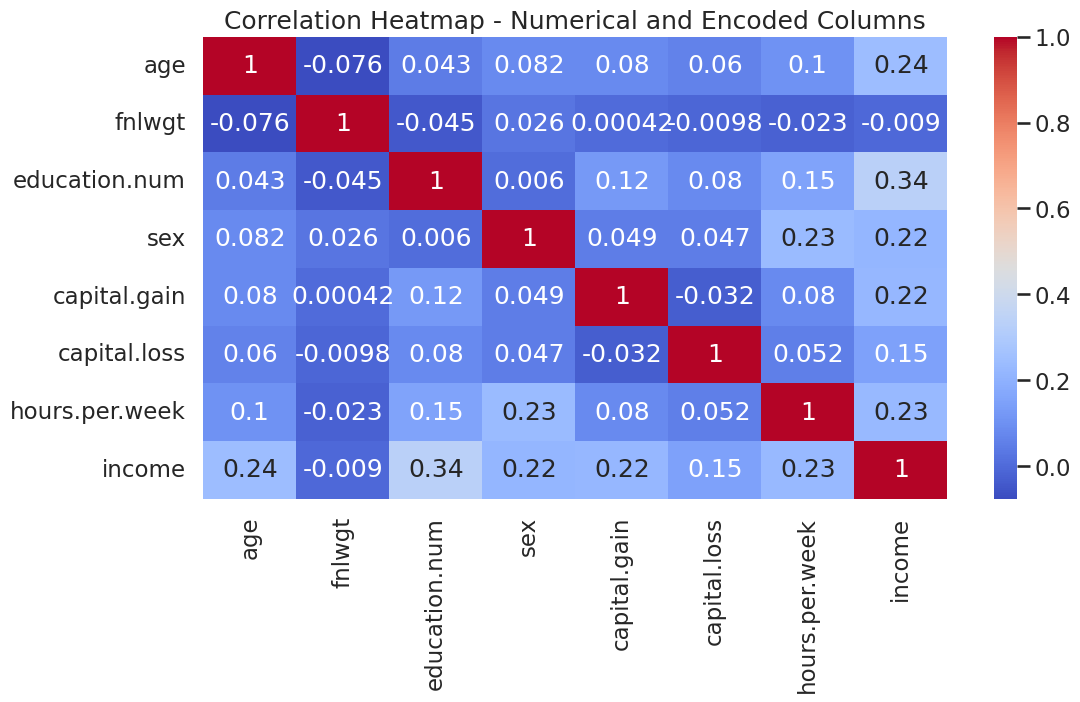

In [17]:
# Correlation heatmap (with one-hot encoded columns)
df_ohe['sex'] = df_ohe['sex'].map({'Male': 1, 'Female': 0})
df_ohe['income'] = df_ohe['income'].map({'>50K': 1, '<=50K': 0})
plt.figure(figsize=(12, 6))
sns.heatmap(df_ohe.select_dtypes(include=[np.number]).corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap - Numerical and Encoded Columns')
plt.show()


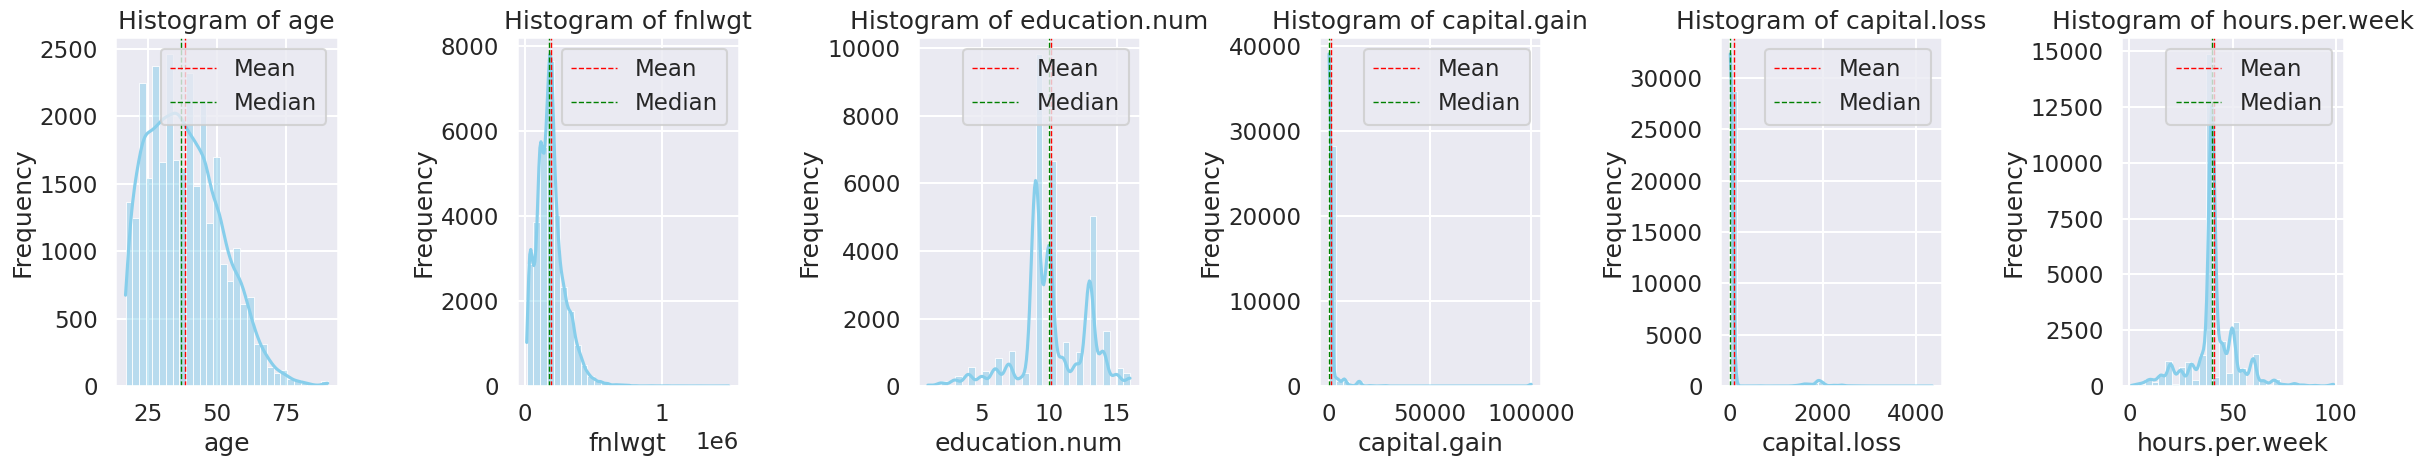

In [18]:
# --- HISTOGRAMS FOR NUMERICAL COLUMNS ---
numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist()

plt.figure(figsize=(4 * len(numerical_cols), 5))
for idx, col in enumerate(numerical_cols):
    plt.subplot(1, len(numerical_cols), idx + 1)
    sns.histplot(df[col], bins=30, kde=True, color='skyblue')
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.axvline(df[col].mean(), color='red', linestyle='dashed', linewidth=1, label='Mean')
    plt.axvline(df[col].median(), color='green', linestyle='dashed', linewidth=1, label='Median')
    plt.legend()
plt.tight_layout()
plt.show()

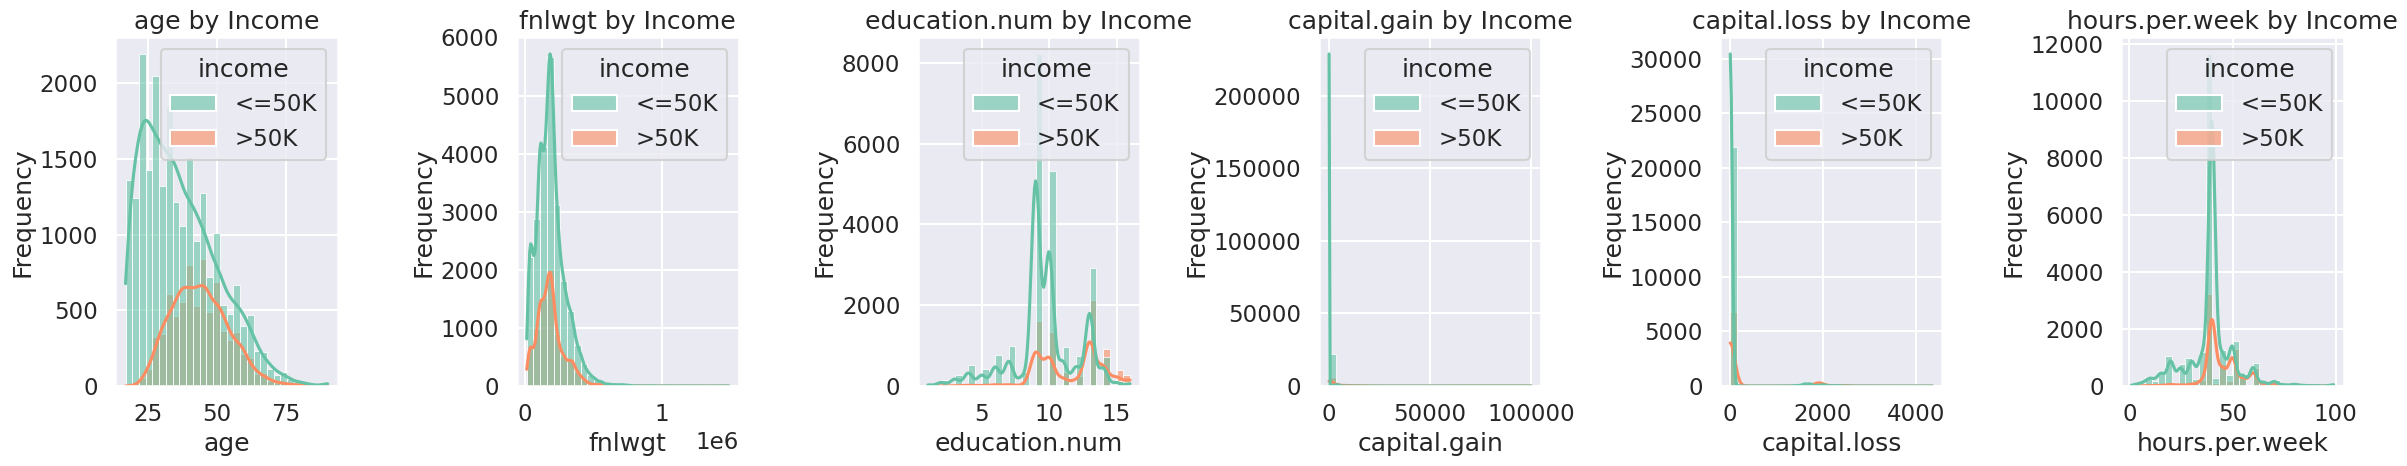

In [19]:
# --- HISTOGRAMS FOR NUMERICAL COLUMNS BY INCOME ---
if 'income' in df.columns:
    plt.figure(figsize=(4 * len(numerical_cols), 5))
    for idx, col in enumerate(numerical_cols):
        plt.subplot(1, len(numerical_cols), idx + 1)
        sns.histplot(data=df, x=col, hue='income', bins=30, kde=True, palette='Set2', alpha=0.6)
        plt.title(f'{col} by Income')
        plt.xlabel(col)
        plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()

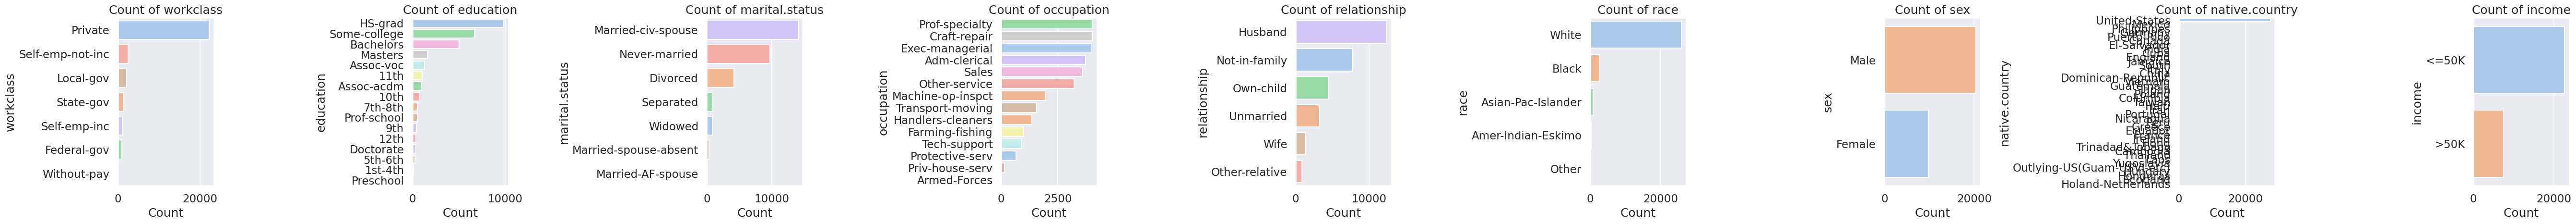

In [24]:
# --- HISTOGRAMS FOR CATEGORICAL COLUMNS ---
categorical_cols = df.select_dtypes(exclude=[np.number, bool]).columns.tolist()
plt.figure(figsize=(6 * len(categorical_cols), 5))
for idx, col in enumerate(categorical_cols):
    plt.subplot(1, len(categorical_cols), idx + 1)
    sns.countplot(y=col, data=df, order=df[col].value_counts().index, hue=col, palette='pastel')
    plt.title(f'Count of {col}')
    plt.xlabel('Count')
    plt.ylabel(col)
plt.tight_layout()
plt.show()

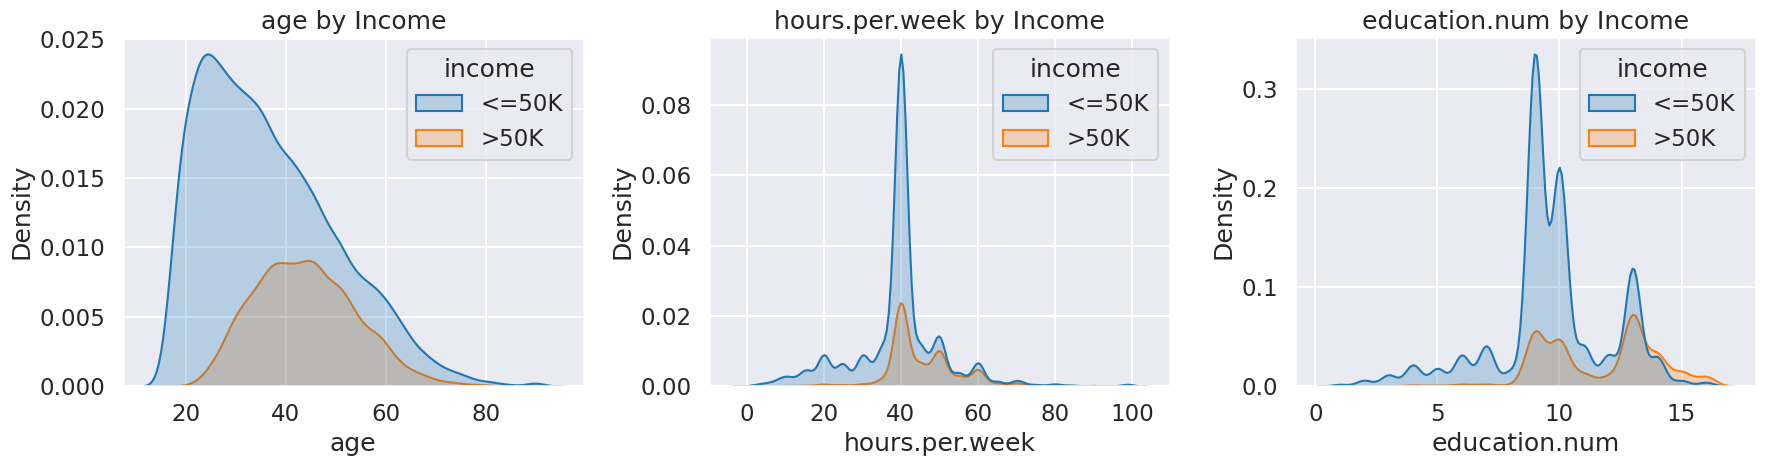

In [21]:
# KDE plots of numerical columns by income
columns_to_plot = ['age', 'hours.per.week', 'education.num']
fig, axs = plt.subplots(1, len(columns_to_plot), figsize=(18, 5))
for i, col in enumerate(columns_to_plot):
    sns.kdeplot(data=df, x=col, hue='income', fill=True, ax=axs[i])
    axs[i].set_title(f'{col} by Income')
plt.tight_layout()
plt.show()

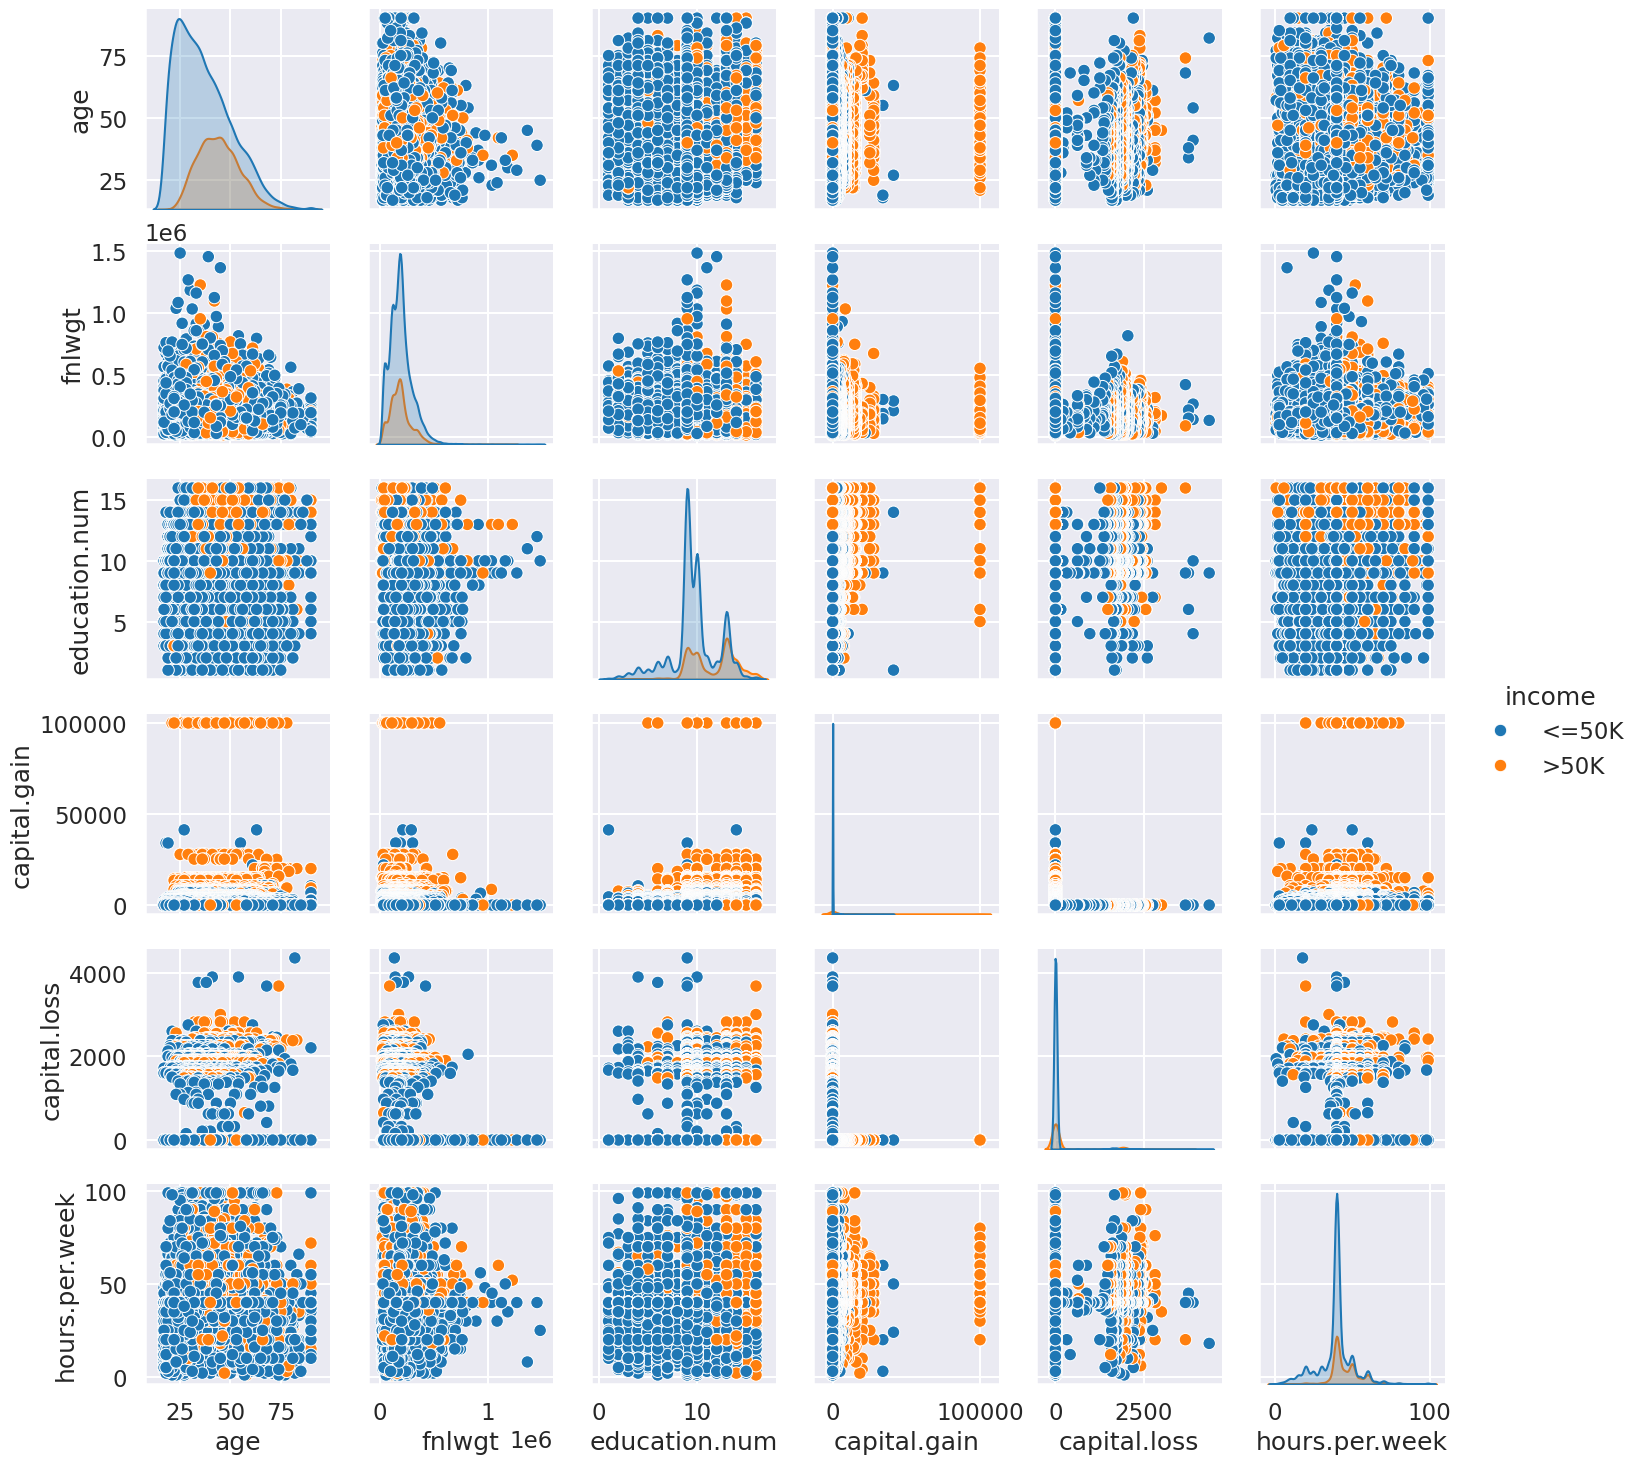

In [22]:
# Pairplot for numerical columns and income
sns.pairplot(df, vars=numerical_cols, hue='income', diag_kind='kde')
plt.show()

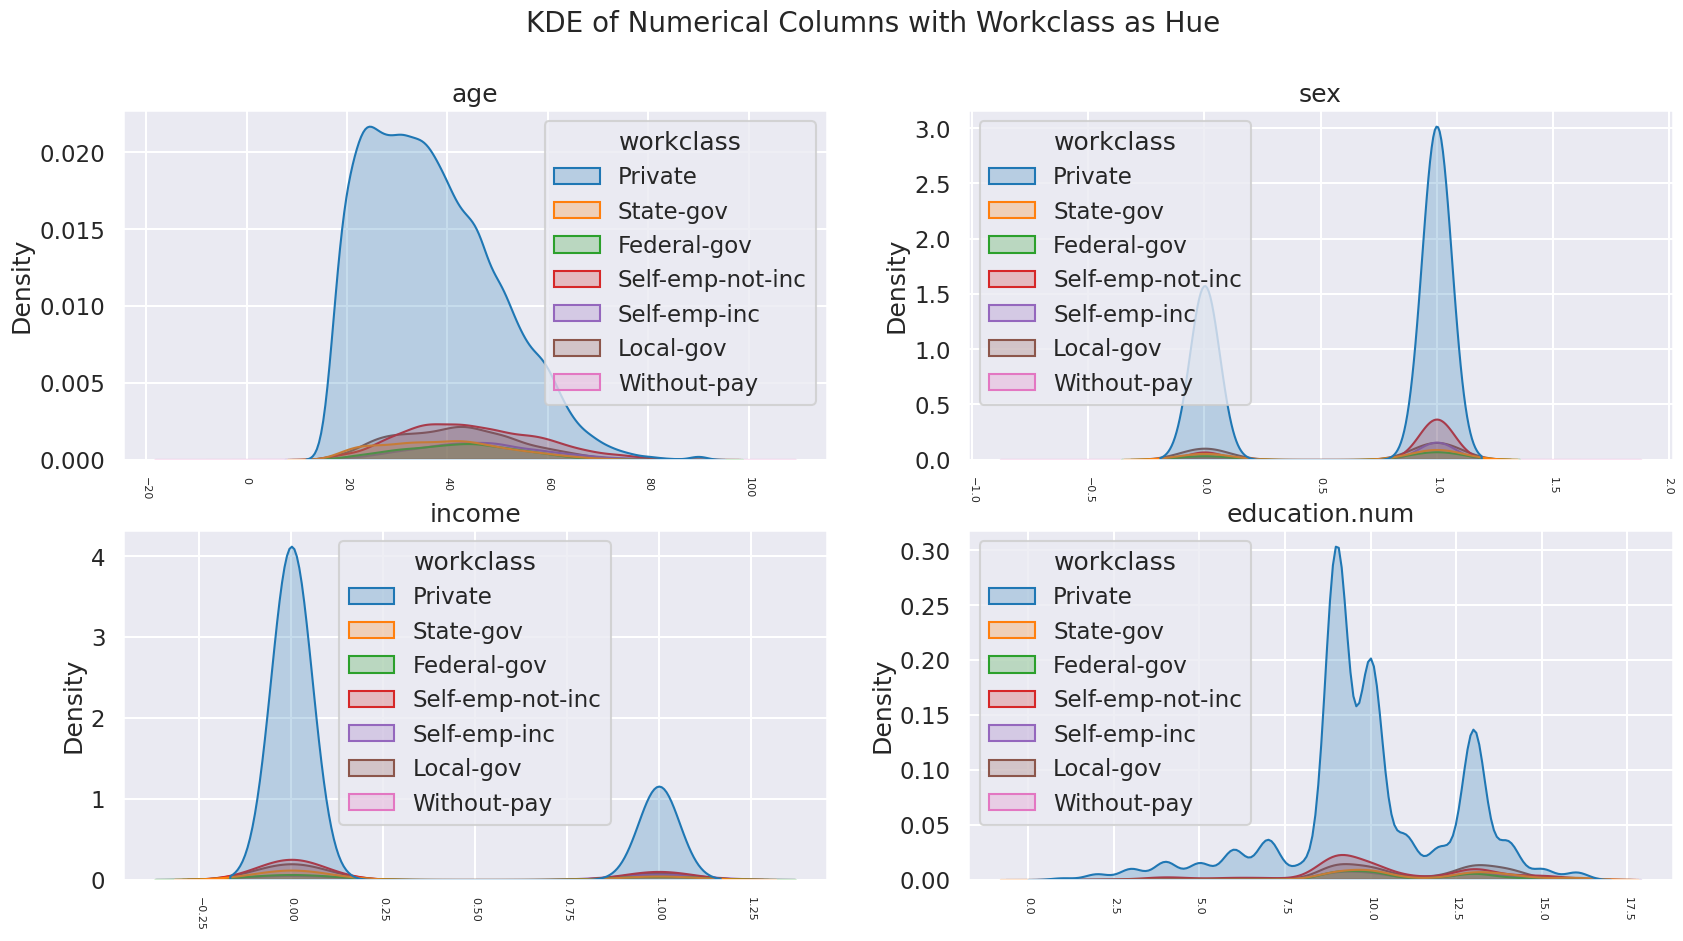

In [23]:
#Plot KDE of numerical columns with workclass as hue
fig, axs = plt.subplots(2, 2, figsize=(20, 10))
fig.suptitle('KDE of Numerical Columns with Workclass as Hue', fontsize=20)
columns_to_plot = ['age', 'sex', 'income', 'education.num']
for i, col in enumerate(columns_to_plot):
    ax = axs[i // 2, i % 2]
    sns.kdeplot(data=df_ohe, x=col, hue=df['workclass'], ax=ax, fill=True, warn_singular=False)
    ax.set_title(col)
    ax.set_xlabel('')
    ax.set_ylabel('Density')
    ax.xaxis.set_tick_params(rotation=270, labelsize=8)
plt.show()


Conclusion

This notebook provides a comprehensive analysis of the Adult Income dataset, exploring various aspects of the data through cleaning, encoding, and visualization. Below are the major conclusions and observations derived from the analysis:
1. Demographics and Income

    Age: Older individuals tend to have a higher probability of earning more than $50K.

    Gender: Males are more likely to earn higher incomes compared to females.

    Education: Higher education levels (e.g., Bachelor's, Master's, Doctorate) are strongly correlated with higher income levels.

2. Work and Education

    Workclass: Individuals in private jobs form the majority of both high and low-income groups.

    Sector Trends: People with higher education levels tend to work in non-private sectors and are more likely to earn higher incomes.

    Common Education: Education levels between 8-10 (e.g., HS-Grad) are the most common among the population.

3. Work Hours and Income

    Hours per Week: Individuals working around 40 hours per week are more likely to earn higher incomes.

    Gender Difference: There is a noticeable trend of males working more hours compared to females.

4. Categorical Insights

    Country and Race: The majority of individuals belong to the United States, with over 80% identifying as White.

    Occupation: Most individuals are employed in private jobs, with occupations being well-distributed across categories.

5. Data Bias and Limitations

    Bias: The dataset shows biases in gender, race, and workclass distributions, which may affect the generalizability of any models built using this data.

    Ambiguous Columns: Certain columns, such as fnlwgt and relationship, appear ambiguous and may require further investigation or exclusion from analysis.

6. Visualization Insights

    Correlations: Heatmaps and KDE plots reveal strong correlations between education, age, work hours, and income.

    Pair Plots: Pair plots provide a deeper understanding of relationships between numerical columns and categorical variables.



General Statements

    Data Cleaning: This analysis highlights the importance of data cleaning and preprocessing, such as handling missing values and one-hot encoding, to ensure meaningful insights.

    Visualization: The visualizations provide a clear understanding of trends and relationships within the dataset, aiding in decision-making and hypothesis generation.

    Future Work: Future work could involve building predictive models to classify income levels or exploring additional datasets to validate the findings.
